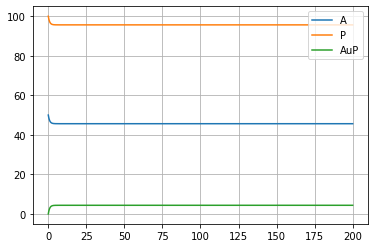

array([[5.00000000e+01, 4.99502864e+01, 4.99011412e+01, ...,
        4.56356105e+01, 4.56356105e+01, 4.56356105e+01],
       [1.00000000e+02, 9.99502864e+01, 9.99011412e+01, ...,
        9.56356105e+01, 9.56356105e+01, 9.56356105e+01],
       [0.00000000e+00, 4.97136219e-02, 9.88588459e-02, ...,
        4.36438947e+00, 4.36438947e+00, 4.36438947e+00]])

In [1]:
import numpy as np
from src.OdeModel import OdeModel
import src.reactions as re

PPI_Motif1 = OdeModel('PPI_1')
PPI_Motif1.addReaction(re.MassAction('A', 'P', Kd=1))
PPI_Motif1.specieConc(['A', 'P'], [50, 100])

PPI_Motif1.simulate_beta(200, plot=True)


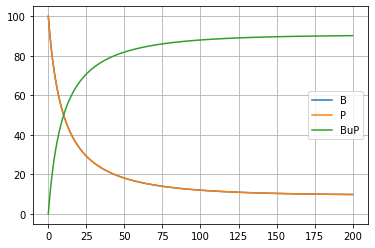

array([[1.00000000e+02, 9.99001004e+01, 9.98004012e+01, ...,
        9.81595630e+00, 9.81589462e+00, 9.81583295e+00],
       [1.00000000e+02, 9.99001004e+01, 9.98004012e+01, ...,
        9.81595630e+00, 9.81589462e+00, 9.81583295e+00],
       [0.00000000e+00, 9.98996039e-02, 1.99598818e-01, ...,
        9.01840437e+01, 9.01841054e+01, 9.01841671e+01]])

In [2]:
PPI_Motif2 = OdeModel('PPI_2')
PPI_Motif2.addReaction(re.MassAction('B', 'P', Kd=0.001))
PPI_Motif2.specieConc(['B', 'P'], [100, 100])

PPI_Motif2.simulate_beta(200, plot=True)


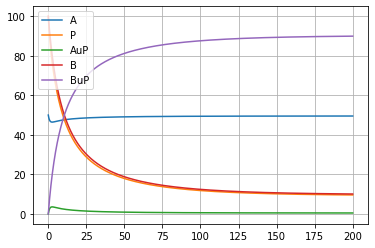

In [3]:
coupled_PPI = PPI_Motif1.combine(PPI_Motif2, 'Coupled_PPI')
coupled_PPI.simulate_beta(200)
coupled_PPI.plot()


In [4]:
hiddenNF = OdeModel('hiddenNF')
hiddenNF.addReaction(re.MichaelisMentenGeneral('B', 'BStar'))

hiddenNF = hiddenNF.combine(coupled_PPI, 'hiddenNF')
print(hiddenNF)


name: hiddenNF_1 | forward specie(s): B | backward specie(s): BStar | type: MichaelisMentenGeneral
name: hiddenNF_2 | forward specie(s): A P | backward specie(s): AuP | type: MassAction
name: hiddenNF_3 | forward specie(s): B P | backward specie(s): BuP | type: MassAction



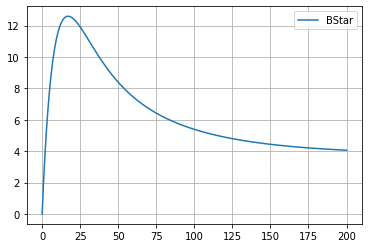

In [5]:
hiddenNF.addStimulator('hiddenNF_1', 'A')
hiddenNF.simulate_beta(200)
hiddenNF.plot(ignore_list=['A', 'B', 'P', 'BuP', 'AuP'])


Biphasic behaviour is caused by the hidden negative feedback of A to B

1.Varusai, T. M., Kolch, W., Kholodenko, B. N. & Nguyen, L. K. Protein–protein interactions generate hidden feedback and feed-forward loops to trigger bistable switches, oscillations and biphasic dose–responses. Mol. BioSyst. 11, 2750–2762 (2015).
